# Quick Start

This tutorial aims to explain in a simple way, how to create decision matrices, 
how to analyze them and how to evaluate them with some multi-criteria analysis methods (MCDA).


## Conceptual overview

Multi-criteria data are complex. This is because at least two syntactically 
disconnected vectors are needed to describe a problem.

1. `matrix`/$A$ choice set.
2. And the vector of criteria optimality sense `objectives`/$C$. 

Additionally it can be accompanied by a vector `w`/$w_j$ with the weighting of the criteria. 

To summarize all these data (and some extra ones), *Scikit-Criteria* provides
a `DecisionMatrix` object along with a `mkdm()` utility function to 
facilitate the creation and validation of the data.

## Your first `DecisionMatrix` object

First we need to import the the *Scikit-Criteria* module.

In [1]:
import skcriteria as skc  # we use skc as an abbreviation for scikit-criteria

Then we need to create the `matrix` and `objectives` vectors. 

The `matrix` must be a **2D array-like** where every column is a criteria, 
and every row is an alternative.

In [2]:
# 2 alternatives by 3 criteria
matrix = [
    [1, 2, 3],  # alternative 1
    [4, 5, 6],  # alternative 2
]
matrix

[[1, 2, 3], [4, 5, 6]]

The `objectives` vector must be a **1D array-like** with number of elements same 
as number of columns in the alternative matrix (`matrix`). Every component of the 
`objectives` vector represent the optimal sense of each criteria.

In [3]:
# let's says the first two alternatives are
# for maximization and the last one for minimization
objectives = [max, max, min]
objectives

[<function max>, <function max>, <function min>]

as you see the `max` and `min` are the built-in function for find max and mins in collections in python.

As you can see the function usage makes the code more readable. Also you can use as aliases of minimization and maximization the numpy function `np.min`, `np.max`, `np.amin`, `np.amax`, `np.nanmin`, `np.nanmax`; the strings `"min"`, `"minimize"`, `"max"`, `"maximize"`, `">"`, `"<"`, `"+"`, `"-"`; and the values `-1` (minimize) and `1` (maximize).

Now we can combine this two vectors in our *Scikit-Criteria* decision matrix.

In [4]:
# we use the built-in function as aliases
dm = skc.mkdm(matrix, [min, max, min])
dm

C0[▼ 1.0] C1[▲ 1.0] C2[▼ 1.0]
A0         1         2         3
A1         4         5         6
[2 Alternatives x 3 Criteria]

As you can see the output of the `DecisionMatrix` object is much more friendly than the plain python lists.

To change the generic names of the alternatives (A0 and A1) and the criteria (C0, C1 and C2); let's assume that our data is about cars (*car 0* and *car 1*) and their characteristics of evaluation are *autonomy* ($maximize$), *comfort* ($maximize$) and *price* ($minimize$). 

To feed this information to our `DecisionMatrix` object we have the parameters: `alternatives` that accept the names of alternatives (must be the same number as the rows that `matrix` has), and `criteria` the criteria names (must have same number of elements with the columns that `matrix` has)

In [5]:
dm = skc.mkdm(
    matrix,
    objectives,
    alternatives=["car 0", "car 1"],
    criteria=["autonomy", "comfort", "price"],
)
dm

autonomy[▲ 1.0] comfort[▲ 1.0] price[▼ 1.0]
car 0               1              2            3
car 1               4              5            6
[2 Alternatives x 3 Criteria]

In our final step let's assume we know in our case, that the importance of the autonomy is the *50%*, the comfort only a *5%* and the price is *45%*. The param to feed this to the structure is called `weights` and must be a vector with the same elements as criterias on your alternative matrix (number of columns).

In [6]:
dm = skc.mkdm(
    matrix,
    objectives,
    weights=[0.5, 0.05, 0.45],
    alternatives=["car 0", "car 1"],
    criteria=["autonomy", "comfort", "price"],
)
dm

autonomy[▲ 0.50] comfort[▲ 0.05] price[▼ 0.45]
car 0                1               2             3
car 1                4               5             6
[2 Alternatives x 3 Criteria]

## Manipulating the Data

The data object are immutable, if you want to modify it you need create a new one. All the data are stored as [pandas dataframes](https://pandas.pydata.org/) and [numpy arrays](https://docs.scipy.org/doc/numpy/user/basics.creation.html)

You can access to the different parts of your data, simply by typing `dm.<your-parameter-name>` for example:

In [7]:
dm.matrix  # note how this data ignores the objectives and the weights

,autonomy,comfort,price
car 0,1,2,3
car 1,4,5,6


In [8]:
dm.objectives

autonomy    MAX
comfort     MAX
price       MIN
Name: Objectives, dtype: object

In [9]:
dm.weights

autonomy    0.50
comfort     0.05
price       0.45
Name: Weights, dtype: float64

In [10]:
dm.alternatives, dm.criteria

(array(['car 0', 'car 1'], dtype=object),
 array(['autonomy', 'comfort', 'price'], dtype=object))

If you want (for example) change the names of the cars from `car 0` and `car 1`; to `VW` and `Ford` you must the copy method and provide the new names:

In [11]:
dm = dm.copy(alternatives=["VW", "Ford"])
dm

autonomy[▲ 0.50] comfort[▲ 0.05] price[▼ 0.45]
VW                  1               2             3
Ford                4               5             6
[2 Alternatives x 3 Criteria]

<div class="alert alert-info">
**Note:** 

A more flexible data manipulation API will relased in future versions.
</div>

## Plotting

The Data structure support some basic routines for plotting. 

The default scikit criteria uses the Heatmap plot to visualize all the data.

<AxesSubplot:xlabel='Criteria', ylabel='Alternatives'>

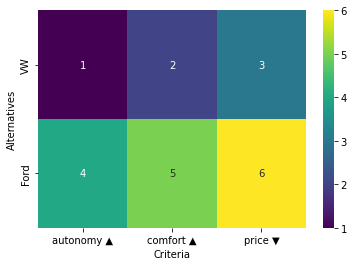

In [12]:
dm.plot()

In the same fashion you can plot the weights of the criteria 

<AxesSubplot:xlabel='Criteria'>

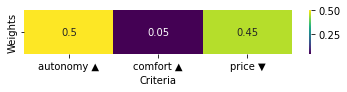

In [13]:
dm.plot.wheatmap()

You can accessing the different kind of plot by passing the name of the plot as first parameter of the method

<AxesSubplot:ylabel='Density'>

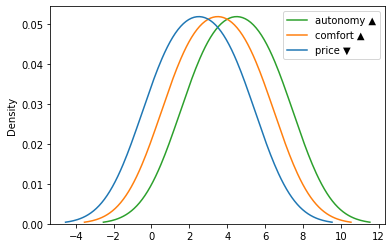

In [14]:
dm.plot("kde")

or by using the name as method call inside the `plot` attribute

<AxesSubplot:ylabel='Density'>

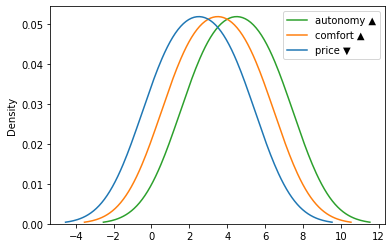

In [15]:
dm.plot.kde()

Every plot has their own set of parameters, defined by the subjacent function
  
Let's change the colors of the weight bar plot and show:

<AxesSubplot:>

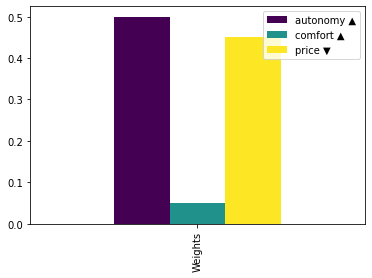

In [16]:
dm.plot.wbar(cmap="viridis")

## Data transformation

Data in its current form is difficult to understand and analyze. On one 
hand they are out of scale, and on the other they have both minimizing and 
maximizing criteria.

<div class="alert alert-info">
Note: Scikit-Criteria objective preference

For a design decision *Scikit-Criteria* always prefers **Maximize** objectives.
There are some functionalities that trigger warnings against  **Minimize** 
criteria, and others that directly and others directly fail.
</div>

To solve these problems, we will use two processors:

- First `MinimizeToMaximize` which inverts the minimizing objectives.
  by dividing out the inverse of each criterion value ($1/C_j$).
- Second, `SumScaler` which will divide each criterion value by the total sum 
  of the criteria, taking all of them into the range $[0, 1]$.

First we start by importing the two necessary modules.

In [17]:
from skcriteria.preprocessing import invert_objectives, scalers

Data in its current form is difficult to understand and analyze. 
The first thing we must do now is to reverse the maximization criteria.

This involves:

1. Create the transformer and store it in the `inverter` variable.
2. Apply the transformation by calling the `transform` method of the transformer and
   passing it as parameter our decision matrix `dm`.
3. Save the transformed decision matrix in a new variable `dmt`.

In code:

In [18]:
inverter = invert_objectives.MinimizeToMaximize()
dmt = inverter.transform(dm)
dmt

autonomy[▲ 0.50] comfort[▲ 0.05] price[▲ 0.45]
VW                  1               2      0.333333
Ford                4               5      0.166667
[2 Alternatives x 3 Criteria]

The next step is to scale the values between $[0, 1]$ using the `SumScaler`.

For this step we need

1. Create the transformer and store it in the `inverter` variable.
   In this case the *scalers* support a parameter called `target` which can 
   have three different values:
   
   - `target="matrix"` The matrix $A$ is normalized.
   - `target="weights"` normalizes the weights $w$.
   - `target="both"` normalizes matrix $A$ and weights $w$.

    In our case we are going to ask the scaler to scale both components of the 
    decision matrix (`target="both"`)
2. Apply the transformation by calling the `transform` method of the transformer and
   passing it as parameter our decision matrix `dmt`.
3. Save the transformed decision by overwriting the variable `dmt`.


In [19]:
scaler = scalers.SumScaler(target="both")
dmt = scaler.transform(dmt)
dmt

autonomy[▲ 0.50] comfort[▲ 0.05] price[▲ 0.45]
VW                0.2        0.285714      0.666667
Ford              0.8        0.714286      0.333333
[2 Alternatives x 3 Criteria]

Now we can analyze if the matrix graphically by creating
a graph for the matrix, and another for the weights.

<div class="alert alert-info">
Note: Advanced plots with Matplotlib

If you need more information on how to make graphs using 
*Matplotlib* please che this tutorial https://matplotlib.org/stable/tutorials/index

</div>

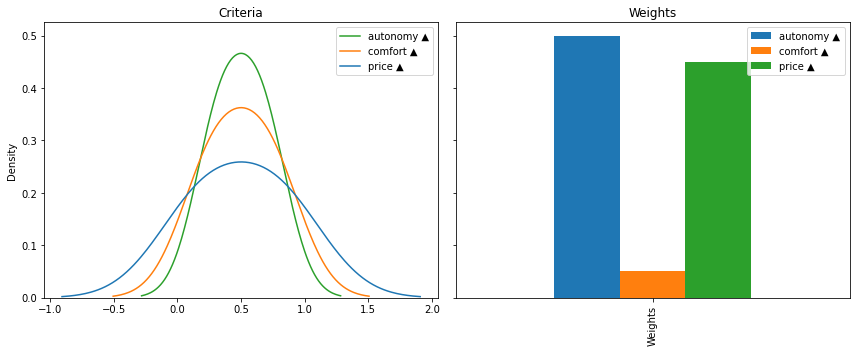

In [20]:
# we are going to user matplotlib capabilities of creat multiple figures
import matplotlib.pyplot as plt

# we create 2 axis with the same y axis
fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# in the first axis we plot the criteria KDE
dmt.plot.kde(ax=axs[0])
axs[0].set_title("Criteria")


# in the second axis we plot the weights as bars
dmt.plot.wbar(ax=axs[1])
axs[1].set_title("Weights")

# adjust the layout of the figute based on the content
fig.tight_layout()

## Using this data to feed some MCDA methods

### Weighted Sum Model

Let's rank our dummy data by [Weighted Sum Model](https://en.wikipedia.org/wiki/Weighted_sum_model)

First we need to import the required module

In [21]:
from skcriteria.madm import simple

To use the methods of MCDA structure we proceed in the same way as when using transformers:

1. We create the decision maker and store it in some variable (`dec` in our case).
2. Execute the `evaluate()` method inside the decision maker to create the result.
3. We store the result in some variable (`rank` in our case).

<div class="alert alert-info">
Note: Hyper-parameters

Some multi-criteria methods support "*hyper parameters*", which are 
provided at the time of creation of the decision maker.

We will see an example with the *ELECTRE-1* method later on.

</div>


In [22]:
dec = simple.WeightedSumModel()
rank = dec.evaluate(dmt)  # we use the tansformed version of the data
rank

,VW,Ford
Rank,2,1


We can see that `WeightedSumModel` prefers the alternative *Ford* over the *VW*.


We can access the intermediate calculators of the method through the `e_` 
attribute of the result object., which (in the case of `WeightedSumModel`) 
contains the resulting scores

In [23]:
rank.e_

extra({'score'})

In [24]:
rank.e_.score

array([0.41428571, 0.58571429])

Obviously you can acces all the parts of the ranking as attributes of 
result object

In [25]:
rank.rank_

array([2, 1])

In [26]:
rank.alternatives

array(['VW', 'Ford'], dtype=object)

In [27]:
rank.method

'WeightedSumModel'

### Technique for Order of Preference by Similarity to Ideal Solution (TOPSIS)

The following example will be approached with the 
[TOPSIS](https://en.wikipedia.org/wiki/TOPSIS). This method was chosen because 
of its popularity and because it uses another scaling technique 
(`VectorScaler`). 

So the first thing one would intuitively do is to invert the original matrix 
criteria (`dm`) and then apply the  normalization; but if we have several 
matrices or several methods this solution becomes cumbersome.

The proposed solution of *Scikit-Criteria* is to offer `pipelines`. The
pipelines combine one or several transformers and one decision-maker the
facilitate the execution of the experiments.

So, let's import the necessary modules for *TOPSIS* and the *pipelines*:

In [28]:
from skcriteria.madm import similarity  # here lives TOPSIS
from skcriteria.pipeline import mkpipe  # this function is for create pipelines

The trick is that the weights still need to be scaled with `SumScaler` so be 
careful to assign the *targets* correctly in each transformer.

In [29]:
pipe = mkpipe(
    invert_objectives.MinimizeToMaximize(),
    scalers.VectorScaler(target="matrix"),  # this scaler transform the matrix
    scalers.SumScaler(target="weights"),  # and this transform the weights
    similarity.TOPSIS(),
)

pipe

SKCPipeline(steps=[('minimizetomaximize', MinimizeToMaximize()), ('vectorscaler', VectorScaler(target='matrix')), ('sumscaler', SumScaler(target='weights')), ('topsis', TOPSIS())])

Now we can directly call the pipeline `evaluate()` method with the original
decision-matrix (`dm`).

This method sequentially executes the three transformers and finally the evaluator to obtain a
result

In [30]:
rank = pipe.evaluate(dm)
rank

,VW,Ford
Rank,2,1


In [31]:
print(rank.e_)
print("Ideal:", rank.e_.ideal)
print("Anti-Ideal:", rank.e_.anti_ideal)
print("Similarity index:", rank.e_.similarity)

extra({'similarity', 'ideal', 'anti_ideal'})
Ideal: [0.48507125 0.04642383 0.40249224]
Anti-Ideal: [0.12126781 0.01856953 0.20124612]
Similarity index: [0.35548671 0.64451329]


Where the `ideal` and `anti_ideal` are the normalizated sintetic better and 
worst altenatives created by TOPSIS, and the `similarity` is how far from the 
*anti-ideal* and how closer to the *ideal* are the real alternatives

### ÉLimination et Choix Traduisant la REalité (ELECTRE)

For our final example, we are going to use the
method [ELECTRE-I](https://en.wikipedia.org/wiki/%C3%89LECTRE) which has two
particularities:

1. It does not return a ranking but a kernel.
2. It supports two hyper-parameters: a concordance threshold `p` and a discordance threshold `q`. 

Let's test the default threshold (`p=0.65, q=0.35`) but with two normalizations
for different matrix: `VectorScaler` and `SumScaler`.

For this we will make two pipelines

In [32]:
from skcriteria.madm import electre


pipe_vector = mkpipe(
    invert_objectives.MinimizeToMaximize(),
    scalers.VectorScaler(target="matrix"),  # this scaler transform the matrix
    scalers.SumScaler(target="weights"),  # and this transform the weights
    electre.ELECTRE1(p=0.65, q=0.35),
)

pipe_sum = mkpipe(
    invert_objectives.MinimizeToMaximize(),
    scalers.SumScaler(target="weights"),  # transform the matrix and weights
    electre.ELECTRE1(p=0.65, q=0.35),
)

In [33]:
kernel_vector = pipe_vector.evaluate(dm)
kernel_vector

,VW,Ford
Kernel,True,True


In [34]:
kernel_sum = pipe_sum.evaluate(dm)
kernel_sum

,VW,Ford
Kernel,True,True


As can be seen for this case both scalings give the same results

In [35]:
import datetime as dt
import skcriteria

print("Scikit-Criteria version:", skcriteria.VERSION)
print("Running datetime:", dt.datetime.now())

Scikit-Criteria version: 0.5.dev0
Running datetime: 2021-12-14 19:12:24.761023
